# <span style="color:green"> CHAPTER 5 </span>

In [1]:
import pandas as pd 
import numpy as np

In [1]:
movies = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv"
movie = pd.read_csv(movies, index_col= 'movie_title')

In [2]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
#Determine whether the duration of each movie is longer than two hours
movies_2_hours = movie['duration']> 120
movies_2_hours.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

In [6]:
#Unfortunately, the output from step 4 is misleading. The duration column has a few missing values.
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [12]:
movies_2_hours.value_counts()

False    3877
True     1039
Name: duration, dtype: int64

In [7]:
#You can prove to yourself that ***the mean of a boolean Series represents the percentage of True values.***
movies_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [28]:
#It is possible to compare two columns from the same DataFrame to produce a boolean Series.
# For instance, we could determine the percentage of movies that have actor 1 with more Facebook likes than actor 2.

actors = movie[['actor_1_facebook_likes','actor_2_facebook_likes']].dropna()

(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

## Constructing multiple boolean conditions

```we construct multiple boolean expressions before combining them together to find all the movies that have an
imdb_score greater than 8, a content_rating of PG-13, and a title_year either before 2000 or after 2009.```

         ```In Python, boolean expressions use the built-in logical operators and, or, and not. These
            keywords do not work with boolean indexing in pandas and are respectively replaced with
                                              &, |, and ~.```

In [14]:
criteria1 = movie['imdb_score'] > 8
criteria2 = movie['content_rating'] == 'PG-13'
criteria3 = ((movie['title_year'] < 2000) | (movie['title_year'] > 2000)) 
#tiene que ir entre parentesis antes del simbolo | ya que si no, se evaluaria 2000 \ movie y eso no tendria sentido

In [15]:
criteria1

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: imdb_score, Length: 4916, dtype: bool

In [16]:
criteria2

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                               True
My Date with Drew                             False
Name: content_rating, Length: 4916, dtype: bool

In [17]:
criteria_final = criteria1 & criteria2 & criteria3

In [18]:
criteria_final

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Length: 4916, dtype: bool

In [19]:
movie[criteria_final].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Dark Knight,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000


In [20]:
#A consequence of pandas using different syntax for the logical operators is that operator 
#precedence is no longer the same.

# Let's take a look at what would happen if the expression in criteria3 was written as follows:

movie.title_year < 2000 | movie.title_year > 2009

#da error

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

```The comparison operators have a higher precedence than and, or, and not. 
However, the new operators for pandas (the bitwise operators &, |, and ~) 
have a higher precedence than the comparison operators```

## Filtering with boolean indexing

```This recipe constructs two complex and independent boolean criteria for different sets of
movies. The first set of movies comes from the previous recipe and consists of those with an
imdb_score greater than 8, a content_rating of PG-13, and a title_year either before
2000 or after 2009. The second set of movies consists of those with imdb_score less than 5,
a content_rating of R, and a title_year between 2000 and 2010.```

In [21]:
#We already have the first criteria
crit_b1 = movie['imdb_score'] < 5
crit_b2 = movie['content_rating'] == 'R'
crit_b3 = ((movie['title_year'] >= 2000) & (movie['title_year'] <= 2010))
criteria_finalb = crit_b1 & crit_b2 & crit_b3

In [22]:
final_crit_all = criteria_final | criteria_finalb

In [23]:
movie[final_crit_all]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Dark Knight,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Young Unknowns,Color,Catherine Jelski,13.0,87.0,0.0,258.0,Eion Bailey,1000.0,58163.0,Drama,...,3.0,English,USA,R,NaN,2000.0,749.0,4.2,NaN,4
Bled,Color,Christopher Hutson,8.0,95.0,3.0,118.0,Jennifer Lee Wiggins,717.0,NaN,Horror,...,30.0,English,USA,R,750000.0,2009.0,134.0,3.1,1.85,128
Hoop Dreams,Color,Steve James,53.0,170.0,23.0,2.0,Arthur Agee,7.0,7830611.0,Documentary|Drama|Sport,...,74.0,English,USA,PG-13,700000.0,1994.0,6.0,8.3,1.33,0


In [25]:
#usar .loc ya que iloc no funciona con boolean indexing
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols] #aplicar el filtro (rows) pero seleccionar solo esas columnassss
movie_filtered

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Dark Knight,9.0,PG-13,2008.0
Guardians of the Galaxy,8.1,PG-13,2014.0
...,...,...,...
The Young Unknowns,4.2,R,2000.0
Bled,3.1,R,2009.0
Hoop Dreams,8.3,PG-13,1994.0


## Replicating boolean indexing with index selection

select all institutions from a particular state with both boolean indexing and index selection

In [27]:
college = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/college.csv"
college = pd.read_csv(college)

In [28]:
#boolean indexing
college[college['STABBR']=='TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [29]:
#index selection
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [30]:
%timeit college[college['STABBR'] == 'TX']

%timeit college2.loc['TX']

#Boolean indexing takes three times as long as index selection.
#por ende, es mejor (cuando se puede) colocar una columna como index (.set_index) y ya filtrar con loc

2.42 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.21 ms ± 77.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%timeit college2.loc[['TX', 'CA', 'NY']] #recordar poner en lista
#o
states = ['TX', 'CA', 'NY']
%timeit college2.loc[states] #este metodo es mas rapido

3.21 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.88 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Selecting with unique and sorted indexes

Index selection performance drastically improves when the index is unique or sorted.

#### RECORDAR HACER .SORT_INDEX()

In [77]:
college3 = college2.sort_index()

In [78]:
%timeit college[college['STABBR'] == 'TX']
%timeit college2.loc['TX']
%timeit college3.loc['TX']
#The sorted index performs nearly an order of magnitude faster than boolean selection.

902 µs ± 38.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
439 µs ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
66.6 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


```BUT! Boolean selection gives much more flexibility than index selection as it is possible to
condition on any number of columns.``` 

ya que en index selection tenemos que definir un index y eso ya establece muchas restricciones

In [36]:
#It is possible to concatenate multiple columns together to form an index.
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [37]:
#From here, we can select all colleges from a particular city and state
college.loc['Miami, FL'].head()
#esta es una forma de volver el index selection un poco mas libre ya que juntamos varias columnas creando un gran variado index

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


## Gaining perspective on stock prices

We can use boolean indexing to find all points in time that a stock has spent above or below a
certain value.

In [38]:
stoncks = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/slb_stock.csv'
slb = pd.read_csv(stoncks, index_col='Date', parse_dates=["Date"])
slb

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621
...,...,...,...,...,...
2017-07-10,64.82,65.68,64.78,65.35,5873639
2017-07-11,65.35,66.24,65.07,65.79,5534042
2017-07-12,66.52,66.60,65.34,65.58,6497554


In [40]:
#Select the closing price as a Series and use the describe method to return summary statistics as a Series:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles= [.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [41]:
#select all closing prices in the upper or lower tenth percentile:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]
criteria

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2017-07-10    False
2017-07-11    False
2017-07-12    False
2017-07-13    False
2017-07-14    False
Name: Close, Length: 1895, dtype: bool

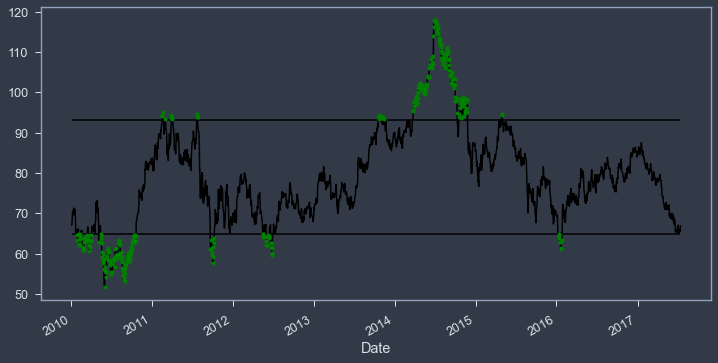

In [42]:
#Plot the resulting filtered Series in green on top of all closing prices in black.

slb_close.plot(color = 'black', figsize = (12,6))
slb_top_bottom_10.plot(marker = 'o', style = ' ', ms = 4, color = 'green')
xmin = criteria.index[0]
xmax = criteria.index[-1]

plt.hlines(y= [lower_10, upper_10], xmin=xmin, xmax=xmax, color = 'black')

```Judging from our new perspective from the plots that we created, it's clear to see that
although SLB's all-time high is close to $120 per share, only 10% of the trading days in the
last seven years have been above $93 per share.```

## Translating SQL WHERE clauses


In [43]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/employee.csv"
employee = pd.read_csv(url)

In [44]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [45]:
employee.DEPARTMENT.value_counts()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Parks & Recreation                 74
Solid Waste Management             43
Library                            36
Fleet Management Department        36
Admn. & Regulatory Affairs         29
Municipal Courts Department        28
Human Resources Dept.              24
Houston Emergency Center (HEC)     23
General Services Department        22
Housing and Community Devp.        22
Dept of Neighborhoods (DON)        17
Legal Department                   17
City Council                       11
Finance                            10
Houston Information Tech Svcs       9
Planning & Development              7
City Controller's Office            5
Mayor's Office                      5
Convention and Entertainment        1
Name: DEPARTMENT, dtype: int64

In [46]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [48]:
employee.BASE_SALARY.describe().astype(int)#astype(int) to avoid all zeros

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [49]:
#now, the query similitude
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts) #this would be the FROM in query.
criteria_gender = employee.GENDER == 'Female' #WHERE gender = 'Female'
criteria_sal = (employee.BASE_SALARY >= 8000) & (employee.BASE_SALARY <= 120000) #Between... and 

In [50]:
#the criteria salary can also be interpreted like this:
criteria_sal2 = employee.BASE_SALARY.between(80000, 120000)

In [51]:
criteria_final = (criteria_dept & criteria_gender & criteria_sal)

In [52]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY'] #columns to pass the filter(criteria)
employee.loc[criteria_final, select_columns]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
55,55,Houston Police Department-HPD,Female,34757.0
61,61,Houston Fire Department (HFD),Female,96668.0
67,67,Houston Police Department-HPD,Female,66614.0
113,113,Houston Police Department-HPD,Female,66614.0
123,123,Houston Police Department-HPD,Female,43443.0
...,...,...,...,...
1959,1959,Houston Fire Department (HFD),Female,52000.0
1964,1964,Houston Police Department-HPD,Female,47996.0
1971,1971,Houston Police Department-HPD,Female,45279.0
1978,1978,Houston Police Department-HPD,Female,27914.0


In [18]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5] #o bien de [5:] y luego ponerla en isin() y quitar ~
all_but_top5 = ~employee.DEPARTMENT.isin(top_5_depts) #to not include the top 5. use ~ for not
employee[all_but_top5]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13
...,...,...,...,...,...,...,...,...,...,...
1976,1976,SENIOR SIDELOADER OPERATOR,Solid Waste Management,34466.0,Hispanic/Latino,Full Time,Female,Active,2015-07-20,2016-01-30
1983,1983,ADMINISTRATIVE SPECIALIST,Admn. & Regulatory Affairs,55172.0,Black or African American,Full Time,Female,Active,2006-10-16,2006-10-16
1985,1985,TRUCK DRIVER,Fleet Management Department,30222.0,Black or African American,Full Time,Male,Active,2013-06-10,2015-08-01
1988,1988,SENIOR ASSISTANT CITY ATTORNEY II,Legal Department,124115.0,White,Full Time,Male,Active,2013-01-23,2013-03-02


## Determining the normality of stock market returns

```Stock market returns are a prime example of a distribution that can look fairly normal but in actuality be
quite far off.```

In [53]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv"
amzn = pd.read_csv(url, index_col='Date', parse_dates=['Date'])

In [54]:
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [55]:
#Create a Series by selecting only the closing price and then 
#using the pct_changemethod to get the daily rate of return:

amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
                ...   
2017-07-11   -0.002348
2017-07-12    0.012453
2017-07-13   -0.005842
2017-07-14    0.001179
2017-07-17    0.008215
Name: Close, Length: 1896, dtype: float64

<AxesSubplot:xlabel='Close', ylabel='Count'>

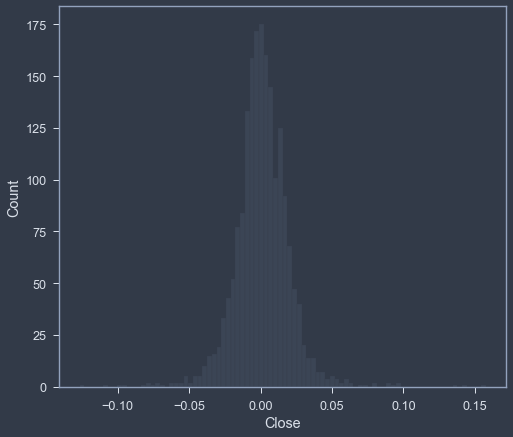

In [58]:
amzn_daily_return.dropna(inplace= True)
sns.histplot(amzn_daily_return)

In [59]:
#Is it really a normal distribution? Calculate the absolute value of the z-score for each observation.

mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

#The z-score is the number of standard deviations away from the mean.
z_score = amzn_daily_return.sub(mean).abs().div(std)

In [60]:
#Find the percentage of returns that are within 1, 2, and 3 standard deviations

#follow the the 68-95-99.7 rule
pcts = [z_score.lt(i).mean() for i in range(1,4)]
print(print('{:.3f} fall within 1 standard deviation. '
'{:.3f} within 2 and {:.3f} within 3'.format(*pcts)))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3
None


In [61]:
#since this is a repetitive process, we can automate it
def test_return_normality(stock_data):
    close = stock_data['Close']
    
    daily_return = close.pct_change().dropna()
    
    daily_return.hist(bins=20)
    
    mean = daily_return.mean()
    
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) / std
    
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
    
    print('{:.3f} fall within 1 standard deviation. '
    '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

## Improving readability of boolean indexing with the query method

```The query DataFrame method is experimental and not as capable as
boolean indexing and should not be used for production code.```

In [62]:
qs = "DEPARTMENT in @depts " \
"and GENDER == 'Female' " \
"and 80000 <= BASE_SALARY <= 120000"
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


## Preserving Series with the where method

```we pass the where method boolean conditions to put a floor and ceiling on
the minimum and maximum number of Facebook likes for actor 1 in the movie dataset.```

In [63]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv"
movie = pd.read_csv(url, index_col='movie_title')

In [64]:
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [66]:
fb_likes.describe().round(2)

count      4909.00
mean       6494.49
std       15106.99
min           0.00
25%         607.00
50%         982.00
75%       11000.00
max      640000.00
Name: actor_1_facebook_likes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

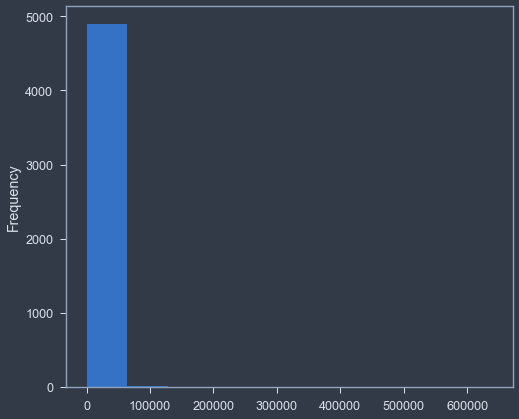

In [67]:
fb_likes.plot(kind = 'hist')

In [68]:
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)
#About 91% of the movies have an actor 1 with fewer than 20,000 likes.

0.91

```We will now use the where method, which accepts a boolean condition. The default
behavior is to return a Series the same size as the original but which has all the
False locations replaced with a missing value:```

In [69]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [70]:
#The second parameter to the where method, other, allows you to control the replacement value.
fb_likes.where(criteria_high, other= 20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [71]:
#we can create criteria to put a floor on the minimum number of likes.
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other=20000).where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

<AxesSubplot:>

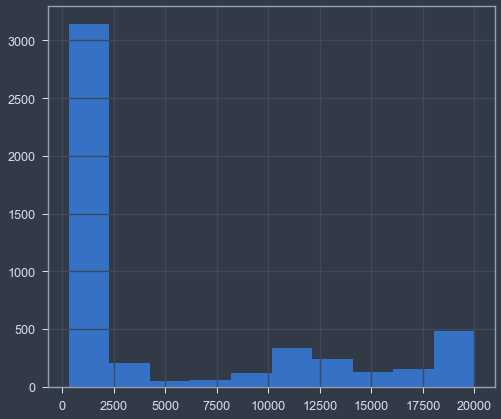

In [72]:
fb_likes_cap.hist()

## Selecting with booleans, integer location, and labels

In [3]:
c1 = movie['content_rating'] == "G"
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [15]:
movie[criteria]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Sunday School Musical,Color,Rachel Goldenberg,5.0,93.0,7.0,73.0,Mark Hengst,349.0,NaN,Drama|Musical,...,18.0,English,USA,G,NaN,2008.0,168.0,2.5,1.85,777


In [4]:
movie_loc = movie.loc[criteria]
movie_loc

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Sunday School Musical,Color,Rachel Goldenberg,5.0,93.0,7.0,73.0,Mark Hengst,349.0,NaN,Drama|Musical,...,18.0,English,USA,G,NaN,2008.0,168.0,2.5,1.85,777


In [5]:
#this process gives the same result as movie['criteria']
movie_loc.equals(movie[criteria])

True

But, what abut iloc?

It turns out that we cannot directly use a Series of booleans because of the index.
We can, however, use an ndarray of booleans. To extract the array, use the
values attribute:

In [13]:
movie_iloc = movie.iloc[a]
movie_iloc

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Sunday School Musical,Color,Rachel Goldenberg,5.0,93.0,7.0,73.0,Mark Hengst,349.0,NaN,Drama|Musical,...,18.0,English,USA,G,NaN,2008.0,168.0,2.5,1.85,777


In [57]:
criteria.values

array([False, False, False, ..., False, False, False])